In [5]:
import pandas as pd
import numpy as np
import wfdb
import os
from tqdm import tqdm

In [6]:
wd = os.getcwd()

patient_files = [file for file in os.listdir("ptb-diagnostic-ecg-database-1.0.0/") if 'patient' in file]

data_files = []
for participant in tqdm(patient_files):
    path = wd + "\\ptb-diagnostic-ecg-database-1.0.0\\" + participant
    filename = [i for i in os.listdir(path) if ".dat" in i][0]
    file = path + "\\" + filename

    data = pd.DataFrame()
    for i in range(15):
        signal_name = wfdb.rdsamp(record_name=file[:-4])[1]['sig_name'][i]
        signal = wfdb.rdsamp(record_name=file[:-4])[0][:, i]
        channel = pd.DataFrame({str(signal_name):signal })
        data = pd.concat([data, channel], axis=1)

    data["Participant"] = participant
    data["Label"] = wfdb.rdsamp(file[:-4])[1]['comments'][4].split(':')[-1]
    
    data_files.append(data)

df = pd.concat(data_files)

100%|██████████| 290/290 [04:56<00:00,  1.02s/it]


In [3]:
df.to_csv('data.csv',index=False)

In [7]:
df=pd.read_csv('data.csv')
df.head()

,i,ii,iii,avr,avl,avf,v1,v2,v3,v4,v5,v6,vx,vy,vz,Participant,Label
0,-0.2445,-0.2290,0.0155,0.2370,-0.1300,-0.1070,-0.0440,-0.1205,-0.0560,0.1060,0.1965,0.1950,-0.0015,0.0600,-0.0090,patient001,Myocardial infarction
1,-0.2425,-0.2335,0.0090,0.2380,-0.1255,-0.1125,-0.0420,-0.1175,-0.0510,0.1095,0.2020,0.1980,-0.0015,0.0610,-0.0100,patient001,Myocardial infarction
2,-0.2415,-0.2345,0.0070,0.2380,-0.1240,-0.1140,-0.0440,-0.1180,-0.0535,0.1095,0.2005,0.1965,-0.0035,0.0555,-0.0085,patient001,Myocardial infarction
3,-0.2410,-0.2290,0.0120,0.2350,-0.1260,-0.1090,-0.0450,-0.1175,-0.0515,0.1115,0.2010,0.1970,-0.0020,0.0535,-0.0080,patient001,Myocardial infarction
4,-0.2315,-0.2270,0.0045,0.2295,-0.1180,-0.1115,-0.0455,-0.1170,-0.0495,0.1115,0.2000,0.1985,0.0005,0.0545,-0.0085,patient001,Myocardial infarction


In [8]:
df['Label'].value_counts()

Label
 Myocardial infarction     16001824
 Healthy control            6109920
 Bundle branch block        1680919
 Cardiomyopathy             1627332
 n/a                        1555248
 Dysrhythmia                1166436
 Hypertrophy                 835272
 Myocarditis                 480048
 Valvular heart disease      382412
 Stable angina               153600
 Heart failure (NYHA 2)       38400
 Heart failure (NYHA 3)       38400
 Heart failure (NYHA 4)       38400
 Palpitation                  38400
 Unstable angina              38400
Name: count, dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder
df[['Label']] = df[['Label']].apply(LabelEncoder().fit_transform)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30185011 entries, 0 to 30185010
Data columns (total 17 columns):
 #   Column       Dtype  
---  ------       -----  
 0   i            float64
 1   ii           float64
 2   iii          float64
 3   avr          float64
 4   avl          float64
 5   avf          float64
 6   v1           float64
 7   v2           float64
 8   v3           float64
 9   v4           float64
 10  v5           float64
 11  v6           float64
 12  vx           float64
 13  vy           float64
 14  vz           float64
 15  Participant  object 
 16  Label        int32  
dtypes: float64(15), int32(1), object(1)
memory usage: 3.7+ GB


In [11]:
df['Label'].value_counts()

Label
8     16001824
3      6109920
0      1680919
1      1627332
14     1555248
2      1166436
7       835272
9       480048
13      382412
11      153600
4        38400
5        38400
6        38400
10       38400
12       38400
Name: count, dtype: int64

In [13]:
label_dict = {
    0: 'Bundle branch block',
    1: 'Cardiomyopathy',
    2: 'Dysrhythmia',
    3: 'Healthy control',
    4: 'Heart failure (NYHA 2)',
    5: 'Heart failure (NYHA 3)',
    6: 'Heart failure (NYHA 4)',
    7: 'Hypertrophy',
    8: 'Myocardial infarction',
    9: 'Myocarditis',
    10: 'Palpitation',
    11: 'Stable angina',
    12: 'Unstable angina',
    13: 'Valvular heart disease',
}



In [14]:
df_0=(df[df['Label']==8]).sample(n=5000,random_state=42)
df_1=(df[df['Label']==3]).sample(n=5000,random_state=42)
df_2=(df[df['Label']==0]).sample(n=5000,random_state=42)
df_3=(df[df['Label']==1]).sample(n=5000,random_state=42)
df_4=(df[df['Label']==2]).sample(n=5000,random_state=42)
df_5=(df[df['Label']==7]).sample(n=5000,random_state=42)
df_6=(df[df['Label']==9]).sample(n=5000,random_state=42)
df_7=(df[df['Label']==13]).sample(n=5000,random_state=42)
df_8=(df[df['Label']==11]).sample(n=5000,random_state=42)
df_9=(df[df['Label']==4]).sample(n=5000,random_state=42)
df_10=(df[df['Label']==5]).sample(n=5000,random_state=42)
df_11=(df[df['Label']==6]).sample(n=5000,random_state=42)
df_12=(df[df['Label']==10]).sample(n=5000,random_state=42)
df_13=(df[df['Label']==12]).sample(n=5000,random_state=42)

In [15]:
new_df=pd.concat([df_0,df_1,df_2,df_3,df_4,df_5,df_6,df_7,df_8,df_9,df_10,df_11,df_12,df_13])

In [16]:
new_df['Label'].value_counts()

Label
8     5000
3     5000
0     5000
1     5000
2     5000
7     5000
9     5000
13    5000
11    5000
4     5000
5     5000
6     5000
10    5000
12    5000
Name: count, dtype: int64

In [17]:
new_df=new_df.reset_index(drop=True)

In [18]:
new_df.drop(['Participant'],axis=1,inplace=True)

In [19]:
new_df

,i,ii,iii,avr,avl,avf,v1,v2,v3,v4,v5,v6,vx,vy,vz,Label
0,0.2840,0.5480,0.2640,-0.4160,0.0100,0.4060,0.2865,0.0865,0.1605,0.2010,0.0370,0.0445,-0.0510,0.1555,-0.0915,8
1,0.0525,-0.0135,-0.0665,-0.0200,0.0595,-0.0400,0.1485,0.0550,0.1070,0.1005,0.2035,-0.2625,-0.1415,-0.1785,-0.2200,8
2,-2.0630,-1.8775,0.1855,1.9705,-1.1240,-0.8460,0.4335,-1.2030,-1.3150,-0.9390,-1.1360,-0.5235,-0.0515,-2.9295,-1.6390,8
3,0.0105,-0.0665,-0.0765,0.0275,0.0440,-0.0710,0.0980,-0.0020,0.0465,0.0330,-0.2745,-0.0800,-0.1460,-0.1405,0.0150,8
4,-0.1375,0.2790,0.4175,-0.0710,-0.2770,0.3480,-0.1715,-0.3300,-0.4625,-0.3505,-0.2835,-0.2020,-0.0350,0.2940,0.1220,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.1240,-0.3270,-0.4505,0.1015,0.2875,-0.3885,-0.6390,-0.6305,-0.7955,-0.8495,-0.8210,-0.8085,-0.0015,-0.0545,0.5695,12
69996,-0.0815,-0.0685,0.0130,0.0750,-0.0470,-0.0275,0.0770,0.0595,0.0775,0.0125,-0.1005,-0.0960,-0.0850,-0.1050,-0.0560,12
69997,-0.1485,0.2430,0.3915,-0.0470,-0.2700,0.3175,0.5015,0.5115,0.5190,0.5000,0.4410,0.4215,-0.0900,0.0525,-0.4870,12
69998,-0.2850,-0.0130,0.2720,0.1495,-0.2785,0.1295,0.5695,0.3720,0.2405,0.0035,-0.2095,-0.2175,-0.3740,-0.0505,-0.3970,12


In [20]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score

In [21]:
X = new_df.drop('Label', axis=1)
y = new_df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

In [22]:
X_train=np.array(X_train)
X_test=np.array(X_test)

In [23]:
X_train = X_train.reshape(len(X_train), X_train.shape[1],1)
X_test = X_test.reshape(len(X_test), X_test.shape[1],1)

In [24]:
X_test.shape

(21000, 15, 1)

In [25]:
import tensorflow.keras
y_train=tensorflow.keras.utils.to_categorical(y_train)
y_test=tensorflow.keras.utils.to_categorical(y_test)

In [26]:
def network(X_train,y_train,X_test,y_test):
    

    im_shape=(X_train.shape[1],1)
    inputs_cnn=Input(shape=(im_shape), name='inputs_cnn')
    conv1_1=Convolution1D(32, (3), activation='relu', input_shape=im_shape)(inputs_cnn)
    conv1_1=BatchNormalization()(conv1_1)
    pool1=MaxPool1D(pool_size=(3), strides=(2), padding="same")(conv1_1)
    conv2_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool1)
    conv2_1=BatchNormalization()(conv2_1)
    pool2=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv2_1)
    conv3_1=Convolution1D(128, (3), activation='relu', input_shape=im_shape)(pool2)
    conv3_1=BatchNormalization()(conv3_1)
    pool3=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv3_1)
    flatten=Flatten()(pool3)
    dense_end1 = Dense(128, activation='relu')(flatten)
    dense_end2 = Dense(32, activation='relu')(dense_end1)
    main_output = Dense(14, activation='softmax', name='main_output')(dense_end2)
    
    
    model = Model(inputs= inputs_cnn, outputs=main_output)
    opt=tensorflow.keras.optimizers.Adam(lr=0.001)
    model.compile(optimizer=opt, loss='categorical_crossentropy',metrics = ['accuracy'])
    checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
    early = EarlyStopping(monitor="val_accuracy", mode="max", patience=5, verbose=1)
    redonplat = ReduceLROnPlateau(monitor="val_accuracy", mode="max", patience=3, verbose=2)
    callbacks= [checkpoint, early, redonplat]  # early

    history=model.fit(X_train, y_train,epochs=50,callbacks=callbacks, batch_size=16,validation_data=(X_test,y_test))
    return(model,history)

In [27]:
from keras.layers import Dense, Convolution1D, MaxPool1D, Flatten, Dropout
from keras.layers import Input
from keras.models import Model
from keras.layers import BatchNormalization
import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint,ReduceLROnPlateau
model,history=network(X_train,y_train,X_test,y_test)

Epoch 1/50



3062/3063 [============================>.] - ETA: 0s - loss: 1.2499 - accuracy: 0.6043
Epoch 1: val_accuracy improved from -inf to 0.73519, saving model to best_model.h5
3063/3063 [==============================] - 35s 10ms/step - loss: 1.2498 - accuracy: 0.6043 - val_loss: 0.8218 - val_accuracy: 0.7352 - lr: 0.0010
Epoch 2/50
   7/3063 [..............................] - ETA: 26s - loss: 0.9274 - accuracy: 0.7054

C:\Users\annit\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3063/3063 [==============================] - ETA: 0s - loss: 0.8255 - accuracy: 0.7346
Epoch 2: val_accuracy improved from 0.73519 to 0.78862, saving model to best_model.h5
3063/3063 [==============================] - 30s 10ms/step - loss: 0.8255 - accuracy: 0.7346 - val_loss: 0.6748 - val_accuracy: 0.7886 - lr: 0.0010
Epoch 3/50
3057/3063 [============================>.] - ETA: 0s - loss: 0.6888 - accuracy: 0.7758
Epoch 3: val_accuracy improved from 0.78862 to 0.82338, saving model to best_model.h5
3063/3063 [==============================] - 30s 10ms/step - loss: 0.6884 - accuracy: 0.7760 - val_loss: 0.5414 - val_accuracy: 0.8234 - lr: 0.0010
Epoch 4/50
3058/3063 [============================>.] - ETA: 0s - loss: 0.6132 - accuracy: 0.8003
Epoch 4: val_accuracy improved from 0.82338 to 0.84105, saving model to best_model.h5
3063/3063 [==============================] - 28s 9ms/step - loss: 0.6133 - accuracy: 0.8003 - val_loss: 0.4957 - val_accuracy: 0.8410 - lr: 0.0010
Epoch 5/50
3062/

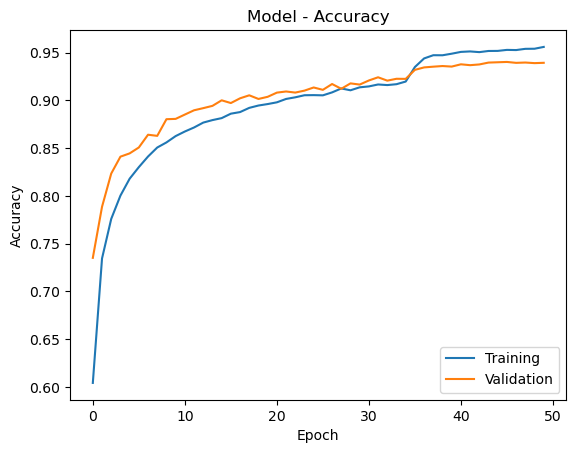

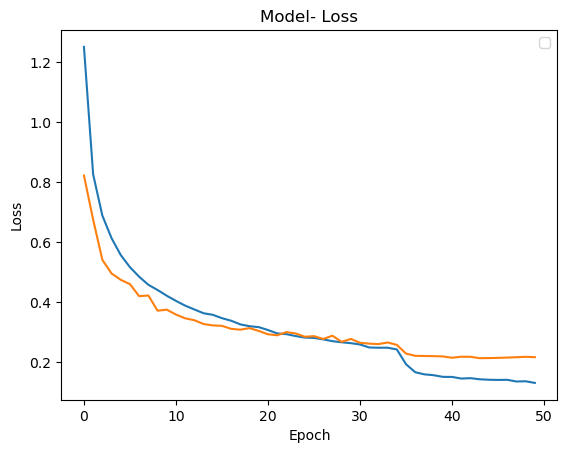

In [28]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model - Accuracy')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()
    
plt.legend(['Training', 'Validation'], loc='upper right')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model- Loss')
plt.show()

In [29]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns

In [30]:
prediction_proba=model.predict(X_test)
prediction=np.argmax(prediction_proba,axis=1)

657/657 [==============================] - 3s 3ms/step


<Axes: >

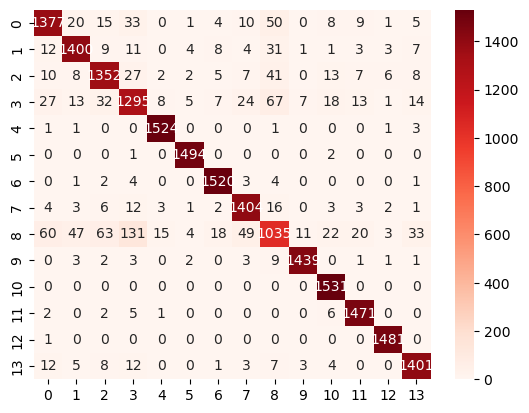

In [31]:
conf_matrix = confusion_matrix(np.argmax(y_test,axis=1), prediction)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds")

In [32]:
print(classification_report(np.argmax(y_test,axis=1), prediction))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91      1533
           1       0.93      0.94      0.93      1494
           2       0.91      0.91      0.91      1488
           3       0.84      0.85      0.85      1531
           4       0.98      1.00      0.99      1531
           5       0.99      1.00      0.99      1497
           6       0.97      0.99      0.98      1535
           7       0.93      0.96      0.95      1460
           8       0.82      0.68      0.75      1511
           9       0.98      0.98      0.98      1464
          10       0.95      1.00      0.98      1531
          11       0.96      0.99      0.98      1487
          12       0.99      1.00      0.99      1482
          13       0.95      0.96      0.96      1456

    accuracy                           0.94     21000
   macro avg       0.94      0.94      0.94     21000
weighted avg       0.94      0.94      0.94     21000



In [33]:
for layer in model.layers:
    print(layer.name)

inputs_cnn
conv1d
batch_normalization
max_pooling1d
conv1d_1
batch_normalization_1
max_pooling1d_1
conv1d_2
batch_normalization_2
max_pooling1d_2
flatten
dense
dense_1
main_output


In [34]:
dense_11_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer('dense_1').output)

In [35]:
feature = dense_11_layer_model.predict(X_train)

1532/1532 [==============================] - 5s 3ms/step


In [36]:
feature.shape

(49000, 32)

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)

rf.fit(feature, np.argmax(y_train,axis=1))

RandomForestClassifier(random_state=42)

In [39]:
test_data=dense_11_layer_model.predict(X_test)

657/657 [==============================] - 2s 3ms/step


In [40]:
test_data.shape

(21000, 32)

In [41]:
predictions = rf.predict(test_data)

In [42]:
import pickle

In [43]:
pickle_out = open("model_rf.pkl","wb")
pickle.dump(rf,pickle_out)
pickle_out.close()

In [44]:
accuracy=accuracy_score(predictions , np.argmax(y_test,axis=1))
print('Accuracy:', accuracy*100, '%.')

Accuracy: 94.06190476190476 %.


<Axes: >

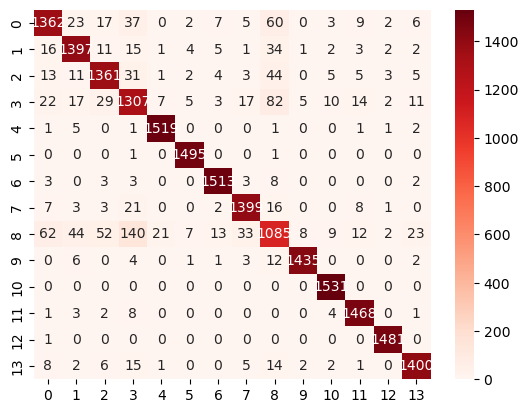

In [45]:
conf_matrix = confusion_matrix(np.argmax(y_test,axis=1), predictions)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds")

In [46]:
print(classification_report(np.argmax(y_test,axis=1), prediction))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91      1533
           1       0.93      0.94      0.93      1494
           2       0.91      0.91      0.91      1488
           3       0.84      0.85      0.85      1531
           4       0.98      1.00      0.99      1531
           5       0.99      1.00      0.99      1497
           6       0.97      0.99      0.98      1535
           7       0.93      0.96      0.95      1460
           8       0.82      0.68      0.75      1511
           9       0.98      0.98      0.98      1464
          10       0.95      1.00      0.98      1531
          11       0.96      0.99      0.98      1487
          12       0.99      1.00      0.99      1482
          13       0.95      0.96      0.96      1456

    accuracy                           0.94     21000
   macro avg       0.94      0.94      0.94     21000
weighted avg       0.94      0.94      0.94     21000



In [47]:
def buildModel():
    newModel = tensorflow.keras.models.Sequential([
        tensorflow.keras.layers.InputLayer(input_shape=(X_train.shape[1], 1)),
        tensorflow.keras.layers.Conv1D(filters=16, kernel_size=21, strides=1, padding='SAME', activation='relu'),
        tensorflow.keras.layers.MaxPool1D(pool_size=3, strides=2, padding='SAME'),
        tensorflow.keras.layers.Conv1D(filters=32, kernel_size=23, strides=1, padding='SAME', activation='relu'),
        tensorflow.keras.layers.MaxPool1D(pool_size=3, strides=2, padding='SAME'),
        tensorflow.keras.layers.Conv1D(filters=64, kernel_size=25, strides=1, padding='SAME', activation='relu'),
        tensorflow.keras.layers.AvgPool1D(pool_size=3, strides=2, padding='SAME'),
        tensorflow.keras.layers.Conv1D(filters=128, kernel_size=27, strides=1, padding='SAME', activation='relu'),
        tensorflow.keras.layers.LSTM(128, return_sequences=True),
        tensorflow.keras.layers.Dropout(rate=0.2),
        tensorflow.keras.layers.LSTM(64, return_sequences=True),
        tensorflow.keras.layers.Flatten(),
        tensorflow.keras.layers.Dense(128, activation='relu'),
        tensorflow.keras.layers.Dropout(rate=0.2),
        tensorflow.keras.layers.Dense(14, activation='softmax')
    ])
    return newModel

In [48]:
model = buildModel()
opt=tensorflow.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy',metrics = ['accuracy'])
checkpoint = ModelCheckpoint('best_model_1.h5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
early = EarlyStopping(monitor="val_accuracy", mode="max", patience=5, verbose=1)
redonplat = ReduceLROnPlateau(monitor="val_accuracy", mode="max", patience=3, verbose=2)
callbacks= [checkpoint, early, redonplat]  # early

history=model.fit(X_train, y_train,epochs=50,callbacks=callbacks, batch_size=16,validation_data=(X_test,y_test))

Epoch 1/50
3060/3063 [============================>.] - ETA: 0s - loss: 1.8010 - accuracy: 0.3810
Epoch 1: val_accuracy improved from -inf to 0.56795, saving model to best_model_1.h5
3063/3063 [==============================] - 56s 16ms/step - loss: 1.8008 - accuracy: 0.3811 - val_loss: 1.2678 - val_accuracy: 0.5680 - lr: 0.0010
Epoch 2/50
   4/3063 [..............................] - ETA: 52s - loss: 1.2113 - accuracy: 0.6094 

C:\Users\annit\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3061/3063 [============================>.] - ETA: 0s - loss: 1.1723 - accuracy: 0.6067
Epoch 2: val_accuracy improved from 0.56795 to 0.66495, saving model to best_model_1.h5
3063/3063 [==============================] - 47s 15ms/step - loss: 1.1720 - accuracy: 0.6068 - val_loss: 0.9716 - val_accuracy: 0.6650 - lr: 0.0010
Epoch 3/50
3062/3063 [============================>.] - ETA: 0s - loss: 0.9592 - accuracy: 0.6742
Epoch 3: val_accuracy improved from 0.66495 to 0.70895, saving model to best_model_1.h5
3063/3063 [==============================] - 46s 15ms/step - loss: 0.9592 - accuracy: 0.6742 - val_loss: 0.8471 - val_accuracy: 0.7090 - lr: 0.0010
Epoch 4/50
3060/3063 [============================>.] - ETA: 0s - loss: 0.8355 - accuracy: 0.7167
Epoch 4: val_accuracy improved from 0.70895 to 0.72271, saving model to best_model_1.h5
3063/3063 [==============================] - 47s 15ms/step - loss: 0.8354 - accuracy: 0.7168 - val_loss: 0.8211 - val_accuracy: 0.7227 - lr: 0.0010
Epoch 5/5

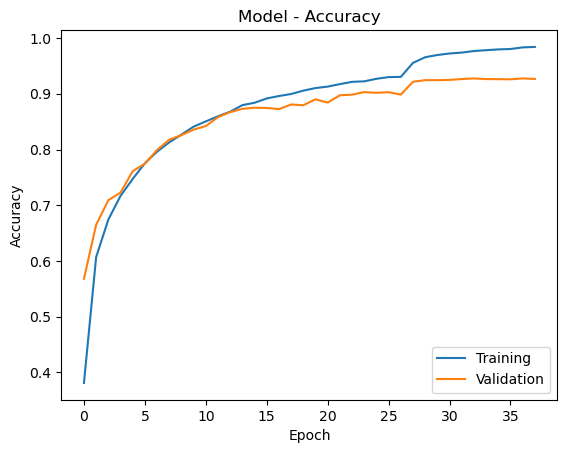

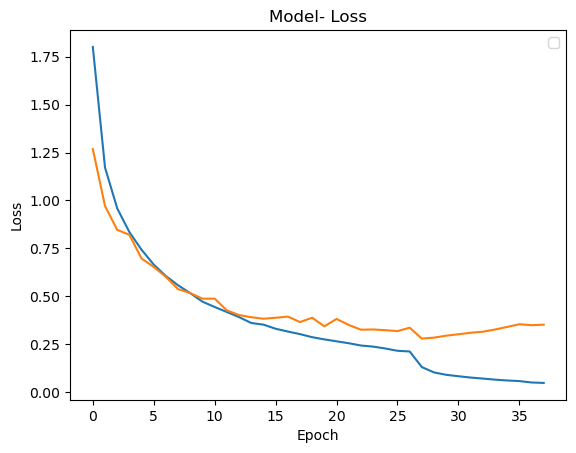

In [49]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model - Accuracy')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()
    
plt.legend(['Training', 'Validation'], loc='upper right')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model- Loss')
plt.show()

In [50]:
prediction_proba=model.predict(X_test)
prediction=np.argmax(prediction_proba,axis=1)

657/657 [==============================] - 5s 5ms/step


<Axes: >

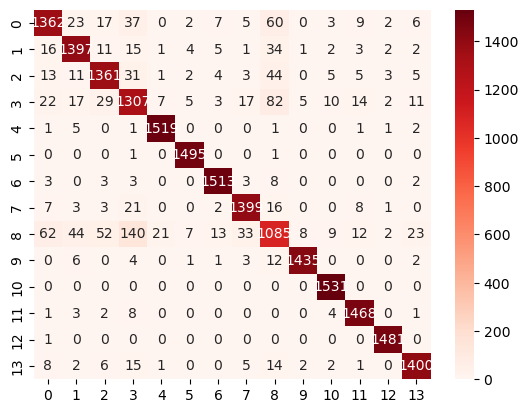

In [51]:
conf_matrix = confusion_matrix(np.argmax(y_test,axis=1), predictions)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds")

In [52]:
print(classification_report(np.argmax(y_test,axis=1), prediction))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89      1533
           1       0.91      0.92      0.91      1494
           2       0.89      0.90      0.90      1488
           3       0.81      0.78      0.80      1531
           4       0.97      0.99      0.98      1531
           5       1.00      1.00      1.00      1497
           6       0.98      0.98      0.98      1535
           7       0.94      0.93      0.94      1460
           8       0.73      0.71      0.72      1511
           9       0.98      0.98      0.98      1464
          10       0.98      1.00      0.99      1531
          11       0.96      0.98      0.97      1487
          12       0.99      0.99      0.99      1482
          13       0.93      0.93      0.93      1456

    accuracy                           0.93     21000
   macro avg       0.93      0.93      0.93     21000
weighted avg       0.93      0.93      0.93     21000



In [53]:
# Assuming `df` is your concatenated DataFrame containing both train and test data
# You can split it into train and test portions as per your previous code
# For demonstration, I'll use train_test_split to create a test set from your data

from sklearn.model_selection import train_test_split

# Splitting the data into train and test sets
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Save the test data to a CSV file
test_data.to_csv('test_data.csv', index=False)


In [49]:
test_data.to_csv('test_data.csv', index=False)